# Liver patient analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("indian_liver_patient.csv")

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


In [5]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
data.rename(columns={'Dataset': 'target', 'Alamine_Aminotransferase': 'Alanine_Aminotransferase', 'Total_Protiens': 'Total_Proteins'}, inplace = True)

In [7]:
data.target.unique()

array([1, 2], dtype=int64)

In [8]:
data.target = [0 if each == 2 else 1 for each in data.target]

In [9]:
#Data contains object variables, I want integers or float variables.

data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [10]:
data.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Proteins                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
target                          int64
dtype: object

In [11]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
target                        0
dtype: int64

In [12]:
#Filling null values.
data['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [13]:
data.fillna(0.94, inplace = True)

In [14]:
data.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


# Data Description

* Age: Age of the patients
* Gender: 1 for male and 0 for female
* Total_Bilirubin: Total Billirubin in mg/dL
* Direct_Bilirubin: Conjugated Billirubin in mg/dL
* Alkaline_Phosphotase: ALP in IU/L (an enzyme)
* Alanine_Aminotransferase: ALT in IU/L (an enzyme)
* Aspartate_Aminotransferase: AST in IU/L (an enzyme)
* Total_Protiens: Total Proteins g/dL
* Albumin: Albumin in g/dL
* Albumin_and_Globulin_Ratio: Albumin/Globulin ratio
* target: patient has liver disease or not ->1 for having the disease and 0 for not having

# Visualization

Text(0.5, 1.0, 'Age wise liver patient')

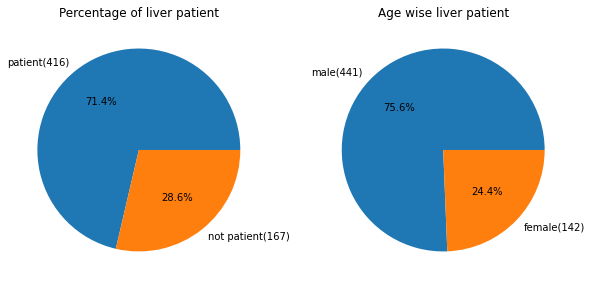

In [15]:
target_counts=data['target'].value_counts().values
gender_counts=data['Gender'].value_counts().values

fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,5))


target_sizes=data.groupby('target').size()
axes[0].pie(x=target_counts,labels=['patient({})'.format(target_sizes[1]),'not patient({})'.format(target_sizes[0])],
            autopct='%1.1f%%'
)
axes[0].set_title("Percentage of liver patient")

gender_sizes=data.groupby('Gender').size()
axes[1].pie(x=gender_counts, labels=['male({})'.format(gender_sizes[1]), 'female({})'.format(gender_sizes[0])], 
    autopct="%1.1f%%"
)
axes[1].set_title("Age wise liver patient")

<AxesSubplot:>

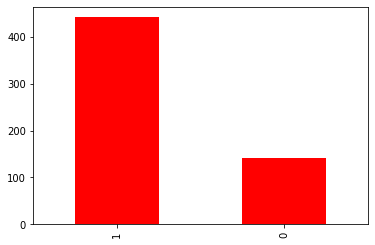

In [16]:
data['Gender'].value_counts().plot.bar(color='red')

More numbers of male than female present in the dataset

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Gender,583.0,0.756432,0.429603,0.0,1.0,1.00,1.0,1.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alanine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Proteins,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947015,0.318492,0.3,0.7,0.94,1.1,2.8


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

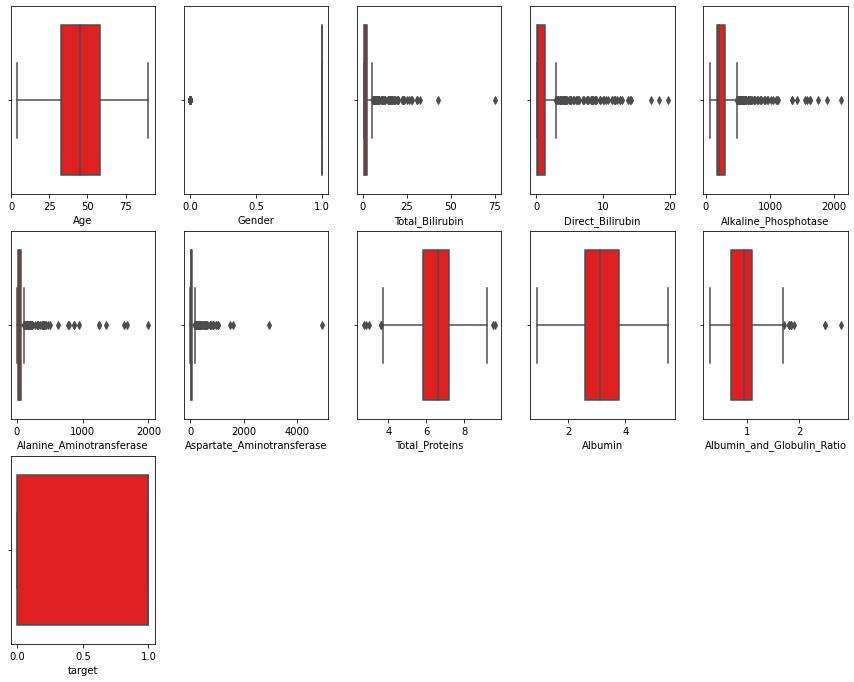

In [18]:
cols = data.select_dtypes(exclude= 'object')
q=1#axis
plt.figure(figsize=(15,20))
for col in cols:
   plt.subplot(5,5,q)
   ax = sns.boxplot(data[col],color='red')
   plt.xlabel(col)
   q+=1
plt.show()

As here we can see there are much outliers but we are not going to eliminate as of now.

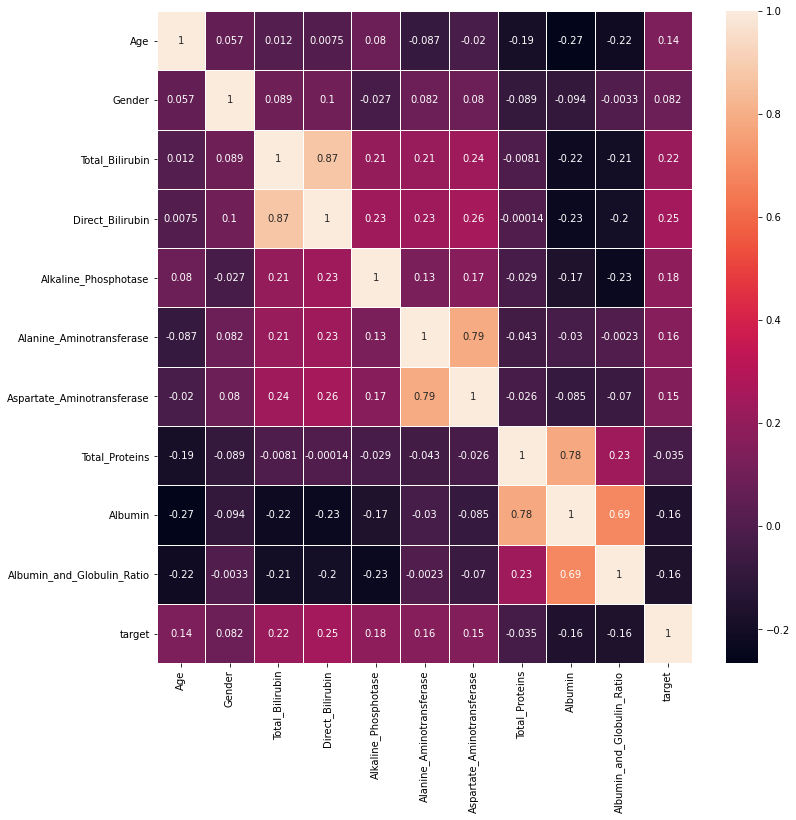

In [19]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation, annot = True, linewidths = 0.5, ax = ax)
plt.show()

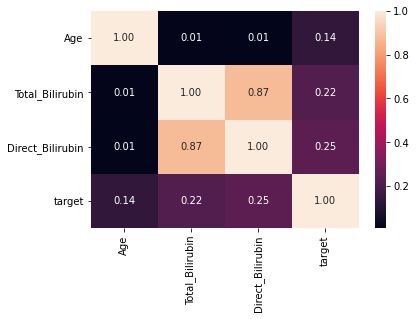

In [20]:
list_ = ["Age", "Total_Bilirubin", "Direct_Bilirubin", "target"]

sns.heatmap(data[list_].corr(), annot = True, fmt = ".2f")
plt.show()

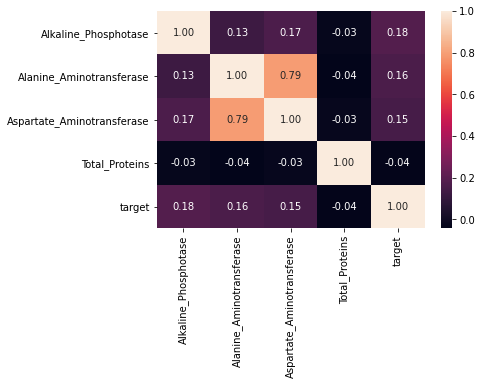

In [21]:
list2 = ["Alkaline_Phosphotase", "Alanine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Proteins", "target"]
sns.heatmap(data[list2].corr(), annot = True, fmt = ".2f")
plt.show()

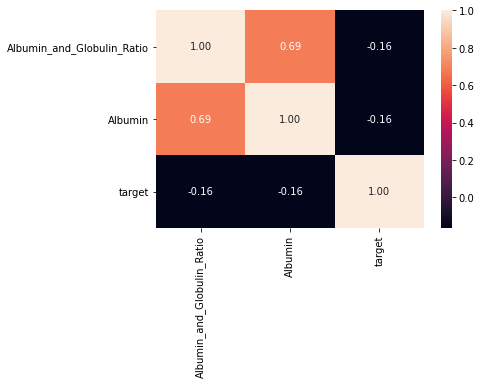

In [22]:
list3 = ["Albumin_and_Globulin_Ratio", "Albumin", "target"]
sns.heatmap(data[list3].corr(), annot = True, fmt = ".2f")
plt.show()

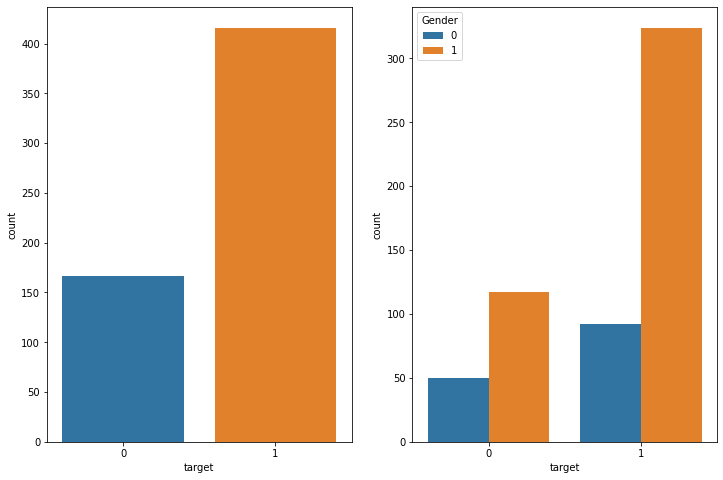

In [23]:
f, axes = plt.subplots(1, 2, figsize = (12, 8))

sns.countplot(x = "target", data = data, ax=axes[0])
sns.countplot(x = "target", hue = 'Gender', data = data, ax=axes[1])
plt.show()

Men are more likely to have a liver disease. Nevertheless, men are the majority among the healthy poeple.

# Age and disease

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


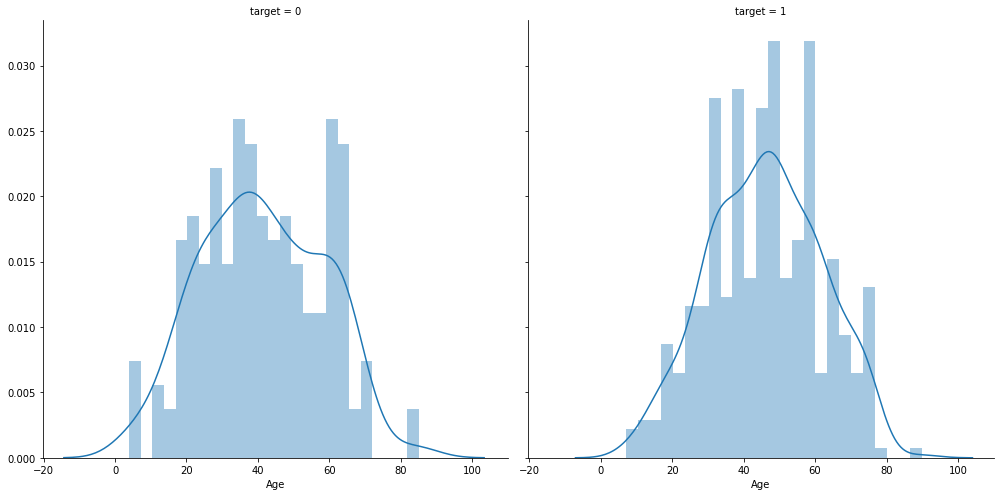

In [24]:
g = sns.FacetGrid(data, col = "target", height = 7)
g.map(sns.distplot, "Age", bins = 25)
plt.show()

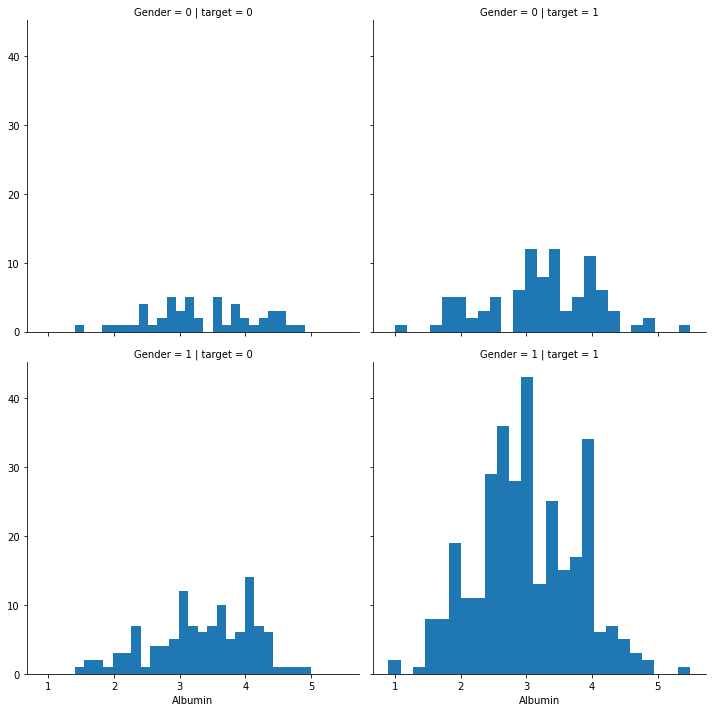

In [25]:
g = sns.FacetGrid(data, col = "target", row = "Gender", height = 5)
g.map(plt.hist, "Albumin", bins = 25)
plt.show()

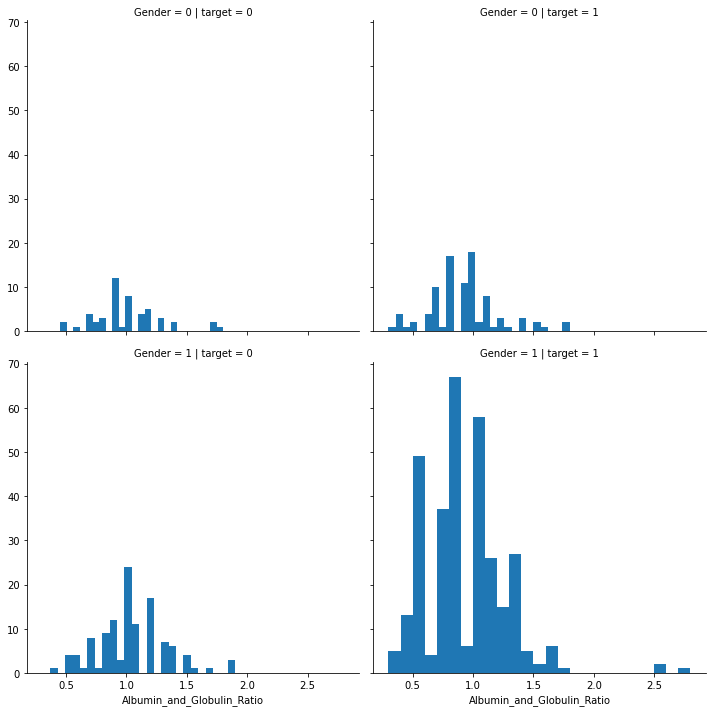

In [26]:
g = sns.FacetGrid(data, col = "target", row = "Gender", height = 5)
g.map(plt.hist, "Albumin_and_Globulin_Ratio", bins = 25)
plt.show()

Albumin and Globulin both are high in patients

# Enzymes and disease

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


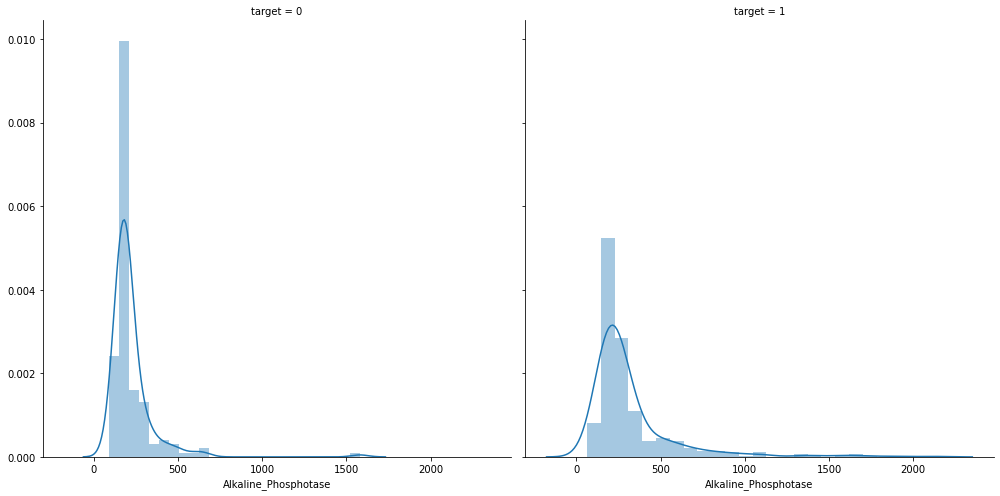

In [27]:
g = sns.FacetGrid(data, col = "target", height = 7)
g.map(sns.distplot, "Alkaline_Phosphotase", bins = 25)
plt.show()

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


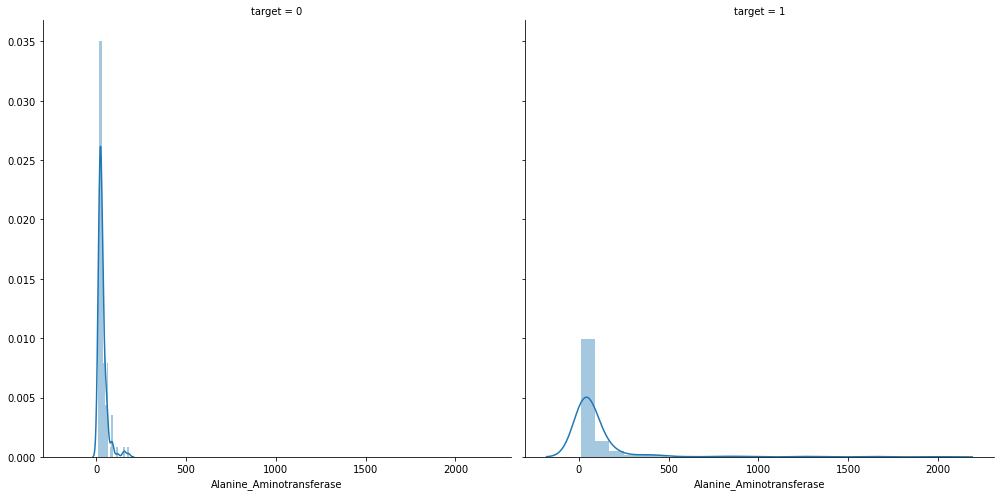

In [28]:
g = sns.FacetGrid(data, col = "target", height = 7)
g.map(sns.distplot, "Alanine_Aminotransferase", bins = 25)
plt.show()

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


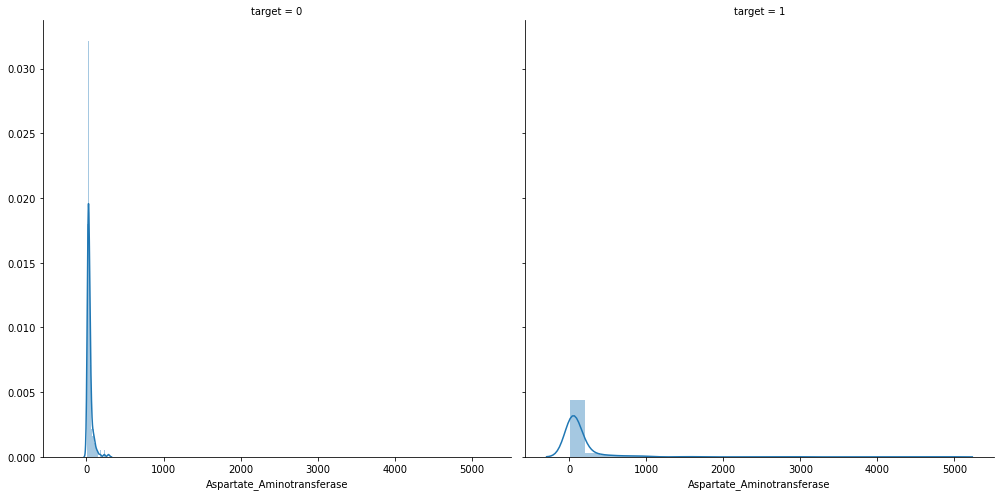

In [29]:
g = sns.FacetGrid(data, col = "target", height = 7)
g.map(sns.distplot, "Aspartate_Aminotransferase", bins = 25)
plt.show()

All the enzymes are lower in patients

# Proteins and disease

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


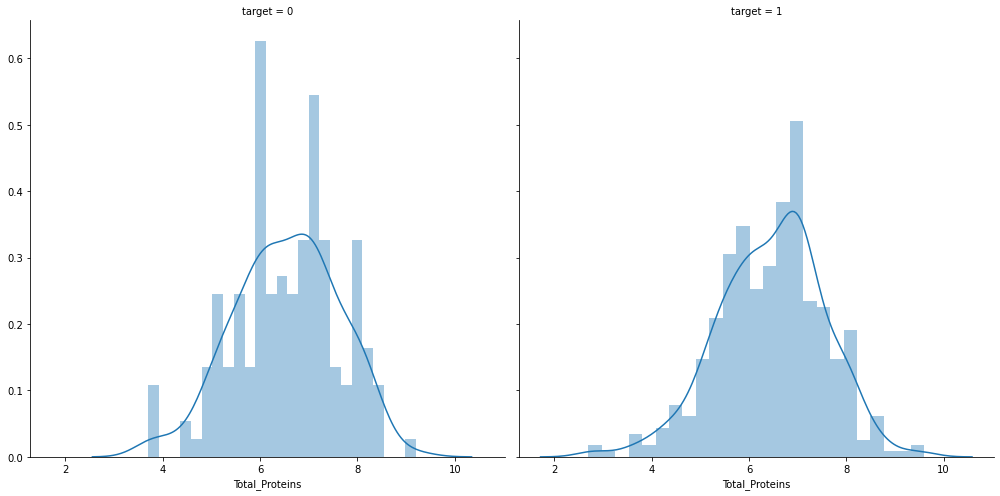

In [30]:
g = sns.FacetGrid(data, col = "target", height = 7)
g.map(sns.distplot, "Total_Proteins", bins = 25)
plt.show()

In [31]:
print("Mean of the total protein level in patiens:", float("{:.2f}".format( data['Total_Proteins'][data.target == 1].mean())))
print("Mean of the total protein level in healthy people:", float("{:.2f}".format(data['Total_Proteins'][data.target == 0].mean())))

Mean of the total protein level in patiens: 6.46
Mean of the total protein level in healthy people: 6.54


# Machine Learning Models

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
scores = {}

#Data Normalisation

In [33]:
data = data.drop(columns = ['Total_Proteins', 'Age', 'Gender'])

In [34]:
y = data.target.values
x_ = data.drop(columns = ["target"])

In [35]:
#Normalisation
x = ((x_ - np.min(x_)) / (np.max(x_) - np.min(x_))).values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [37]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# Logistic regression

In [38]:
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)
print("test accuracy = {}%" .format(float("{:.2f}".format(lr.score(x_test.T, y_test.T) * 100))))

test accuracy = 74.36%


In [39]:
scores['Logistic Regression Score'] = float("{:.2f}".format(lr.score(x_test.T, y_test) * 100))

Cross Validation

In [40]:
training_prediction = lr.predict(x_train.T)

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_train = metrics.r2_score(y_train,training_prediction)

In [42]:
testing_prediction = lr.predict(x_test.T)
r2_test = metrics.r2_score(y_test,testing_prediction)

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x_train.T,y_train,cv=10)

In [44]:
score

array([0.70212766, 0.70212766, 0.70212766, 0.70212766, 0.70212766,
       0.70212766, 0.7173913 , 0.7173913 , 0.7173913 , 0.69565217])

In [45]:
score.mean()

0.7060592044403331

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

Logistic Regression Training Score: 
 70.6
Logistic Regression Test Score: 
 74.36
Coefficient: 
 [[ 1.20620891  2.43582854  1.71332351  1.48280163  0.84825227 -0.66441938
  -0.70306054]]
Intercept: 
 [0.99660322]
Accuracy: 
 0.7435897435897436
Confusion Matrix: 
 [[ 0 30]
 [ 0 87]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<AxesSubplot:>

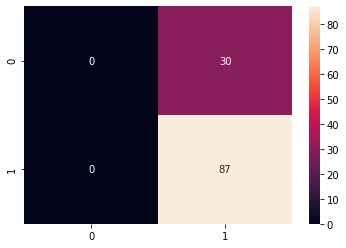

In [47]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(x_train.T, y_train)
#Predict Output
log_predicted= logreg.predict(x_test.T)

logreg_score = round(logreg.score(x_train.T, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test.T, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [48]:
coeff_df = pd.DataFrame(data.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Direct_Bilirubin,2.435829
2,Alkaline_Phosphotase,1.713324
3,Alanine_Aminotransferase,1.482802
0,Total_Bilirubin,1.206209
4,Aspartate_Aminotransferase,0.848252
5,Albumin,-0.664419
6,Albumin_and_Globulin_Ratio,-0.703061
7,target,NaN


# KNN

In [50]:
x_train = x_train.T
x_test = x_test.T

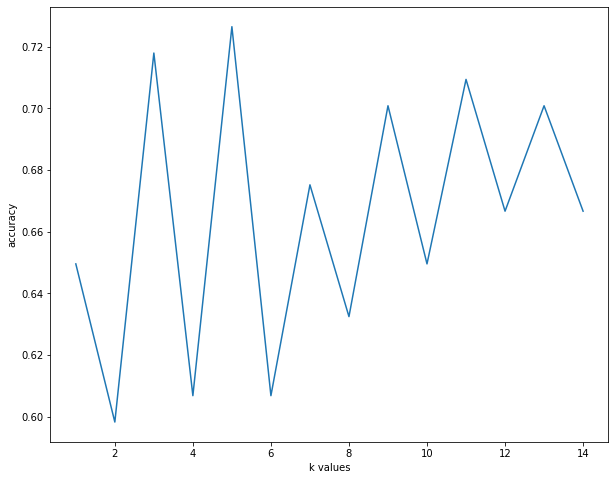

In [51]:
knn_scores = []
for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    knn_scores.append(knn2.score(x_test, y_test))

plt.figure(figsize = (10, 8))
plt.plot(range(1, 15), knn_scores)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

With the k value of 5 we have the best score

In [52]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
print("KNN score: {}" .format(float("{:.2f}".format(knn.score(x_test, y_test) * 100))))

KNN score: 72.65


In [53]:
scores['KNN Score'] = (float("{:.2f}".format(knn.score(x_test, y_test) * 100)))

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
#Predict Output
rf_predicted = knn.predict(x_test)

knn_score = round(knn.score(x_train, y_train) * 100, 2)
knn_score_test = round(knn.score(x_test, y_test) * 100, 2)
print('KNN Train Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

KNN Train Score: 
 78.76
KNN Test Score: 
 72.65
Accuracy: 
 0.7264957264957265
[[13 17]
 [15 72]]
              precision    recall  f1-score   support

           0       0.46      0.43      0.45        30
           1       0.81      0.83      0.82        87

    accuracy                           0.73       117
   macro avg       0.64      0.63      0.63       117
weighted avg       0.72      0.73      0.72       117



# SVM 

In [57]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVC(random_state=1)

In [58]:
print("SVM Score is: {}" .format(float("{:.2f}".format(svm.score(x_test, y_test) * 100))))

SVM Score is: 74.36


In [60]:
scores['SVM Score'] = (float("{:.2f}".format(svm.score(x_test, y_test) * 100)))

In [61]:
svm= SVC(random_state = 1)
svm.fit(x_train, y_train)
#Predict Output
rf_predicted =svm.predict(x_test)

svm_score = round(svm.score(x_train, y_train) * 100, 2)
svm_score_test = round(svm.score(x_test, y_test) * 100, 2)
print('SVM Train Score: \n', random_forest_score)
print('SVM  Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

SVM Train Score: 
 78.76
SVM  Test Score: 
 72.65
Accuracy: 
 0.7435897435897436
[[ 0 30]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Naive Bayes

In [62]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes Score is: {}" .format(float("{:.2f}".format(nb.score(x_test, y_test) * 100))))

Naive Bayes Score is: 52.14


In [63]:
scores['Naive Bayes Score'] = (float("{:.2f}".format(nb.score(x_test, y_test) * 100)))

Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it's almost impossible that we get a set of predictors that are completely independent or one another.

In [66]:
nb = GaussianNB()
nb.fit(x_train, y_train)
#Predict Output
rf_predicted = nb.predict(x_test)

nb_score = round(nb.score(x_train, y_train) * 100, 2)
nb_score_test = round(nb.score(x_test, y_test) * 100, 2)
print('NB Train Score: \n',nb_score)
print('NB Test Score: \n', nb_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

NB Train Score: 
 54.94
NB Test Score: 
 52.14
Accuracy: 
 0.5213675213675214
[[30  0]
 [56 31]]
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        30
           1       1.00      0.36      0.53        87

    accuracy                           0.52       117
   macro avg       0.67      0.68      0.52       117
weighted avg       0.83      0.52      0.52       117



# Decision Tree

In [67]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Decision Tree Score is: {}" .format(float("{:.2f}".format(dt.score(x_test, y_test) * 100))))

Decision Tree Score is: 70.09


In [68]:
scores['Decision Tree Score'] = (float("{:.2f}".format(dt.score(x_test, y_test) * 100)))

In [83]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
#Predict Output
rf_predicted = dt.predict(x_test)

dt_score = round(dt.score(x_train, y_train) * 100, 2)
dt_score_test = round(dt.score(x_test, y_test) * 100, 2)
print('Decision Tree Train Score: \n', dt_score)
print('Decision Tree Test Score: \n', dt_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Decision Tree Train Score: 
 100.0
Decision Tree Test Score: 
 71.79
Accuracy: 
 0.717948717948718
[[15 15]
 [18 69]]
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        30
           1       0.82      0.79      0.81        87

    accuracy                           0.72       117
   macro avg       0.64      0.65      0.64       117
weighted avg       0.73      0.72      0.72       117



# Random Forest

In [84]:
rf = RandomForestClassifier(n_estimators = 100, random_state=1)
rf.fit(x_train, y_train)
print("Random Forest Score is: {}" .format(float("{:.2f}".format(rf.score(x_test, y_test) * 100))))


Random Forest Score is: 75.21


In [85]:
scores['Random Forest Score'] = (float("{:.2f}".format(rf.score(x_test, y_test) * 100)))

In [87]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(x_test)

random_forest_score = round(random_forest.score(x_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(x_test, y_test) * 100, 2)
print('Random Forest Train Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Train Score: 
 100.0
Random Forest Test Score: 
 73.5
[[11 19]
 [12 75]]
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        30
           1       0.80      0.86      0.83        87

    accuracy                           0.74       117
   macro avg       0.64      0.61      0.62       117
weighted avg       0.72      0.74      0.72       117



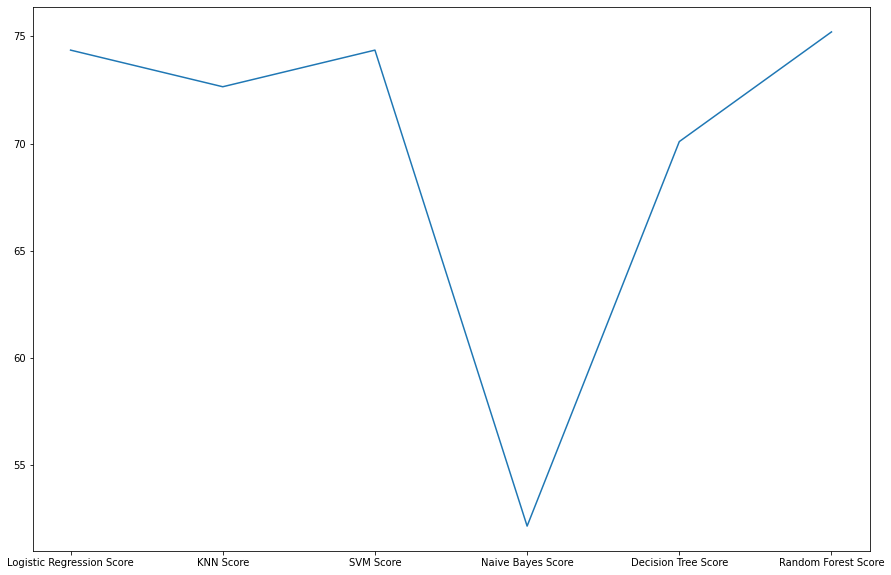

In [89]:
lists = scores.items()
x_axis, y_axis = zip(*lists)
plt.figure(figsize = (15, 10))
plt.plot(x_axis, y_axis)
plt.show()

# Summary

1.As we can see that Random forest is the best model for us as it give us more accuracy.Logistic regression and SVM  are  also giving almost same accuracy.

2.Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it's almost impossible that we get a set of predictors that are completely independent or one another.In our dataset some columns are dependent thats why we are getting only 52.44% accuracy.

3.From below we can see all the enzymes and bilirubin protein affecting out dataset more.

Correlation of selector with all independent variables


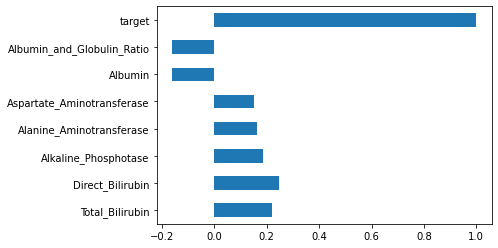

In [90]:
print('Correlation of selector with all independent variables')
data.corr()['target'].plot.barh()
plt.show()

4.As here we have less number of observations and we are not eliminating the outliers so our model can give bias error and some models can misbehave.